In [41]:
from genetic_algorithm.GA import GeneticAlgorithm as GA
from TabuSearch.TS import TabuSearch as TS
from Simulated_Annealing.Simulated_Annealing import SimulatedAnnealing as SA
from sklearn.preprocessing import MinMaxScaler
from utils import *
import matplotlib.pyplot as plt
import functools
from math import sin, sqrt

# Función Objetivo

In [42]:

precision = 0.00001
rango_entero = 512
bits_enteros, bits_decimales = calcular_bits(rango_entero, precision)

def egg_holder(solution,bits_enteros, bits_decimales,precision):
    variables = decodificar_solución(solution,bits_enteros,bits_decimales,precision)
    x , y = variables[0], variables[1]
    return -(y + 47) * sin(sqrt(abs(x/2 + (y + 47)))) - x * sin(sqrt(abs(x - (y + 47))))

fn = functools.partial(egg_holder,bits_enteros = bits_enteros, bits_decimales = bits_decimales, precision=precision)
max_call = 6000

### Parametros Simulated Annealing

In [43]:
parametrosSA = {
	"verbose": False,
    "stopping_criteria_type": "function_calls",
    "max_call_functions": max_call,
    "problem_type": "BenchMark",
    "codification": "binary",
    "min_or_max": "min",
    "cooling": "geometric",
    "limits": (-512,512),
    "variables": 2,
    "precision": precision,
    "alpha": 0.97,
    "beta": 0.8,
    "equilibrium": 20,
    "temperature": 900,
    "final_temperature": 0.01,
}

### Parametros TabuSearch

In [44]:
first_solution = create_first_solution(codification="binary", bits_enteros= bits_enteros, bits_decimales= bits_decimales,variables= 2)
parametrosTS = {
    "verbose": False,
    "first_point":first_solution,
    "tabu_list_size":20,
    "number_of_points": 200,
    "diversification_type": "static",
	"diversification_size": 100,
    "stopping_criteria_type":"function_calls",
    "max_call_functions": max_call,
    "long_term_memory_reset" : True,
    "problem_type": "BenchMark",
    "limits": (-512, 512),
    "precision": precision,
    "variables":2,
	"min_or_max": "min",
    "codification": "binary"
}

### Parametros Genetic Algorithm

In [45]:
parametrosGA = {
    "verbose":False,
    "stopping_criteria_type":"function_calls",
    "max_call_functions": max_call,
    "population_size": 200,
    "selection_operator": "rank",
    "crossover_operator": "kpoints",
    "mutation_operator":"shuffle",
    "problem_type": "BenchMark",
    "variables": 2,
    "precision":precision,
    "limits":(-512,512),
	"min_or_max": "min",
    "codification": "binary"
}

In [46]:
valores_optimos_sa = []
valores_optimos_ts = []
valores_optimos_ga = []

# Prueba 1

Simulated_Annealing
4001 Epoch | Equilibrium 21 | Temperature 2.04 | Cost function: -561.97658  | Aceptance: 100.00 | Function Call: 8000
Solucion: [1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0
 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0]
Tiempo de ejecución: 00:00:00
------------------------------------------------
TabuSearch
iterations 40 | call_functions 8000 | Best: -409.51977 | actual_sol: -408.51977
Solucion: [1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
Genetic Algorithm
Solucion: [0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1
 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------


 Generations 40 | call_functions 8000 | Best: -888.94286

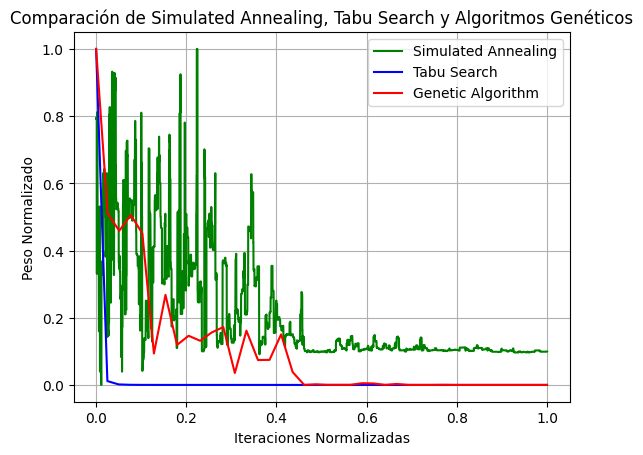

In [47]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 2

Simulated_Annealing
1001 Epoch | Equilibrium 21 | Temperature 196.26 | Cost function: -169.287  | Aceptance: 100.00 | Function Call: 2000
Solucion: [1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 0]
Tiempo de ejecución: 00:00:00
------------------------------------------------
TabuSearch
iterations 10 | call_functions 2000 | Best: -425.274 | actual_sol: -425.274
Solucion: [0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
Genetic Algorithm
Solucion: [0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0]
Tiempo de ejecución: 00:00:04
------------------------------------------------


 Generations 226 | call_functions 45200 | Best: -888.939

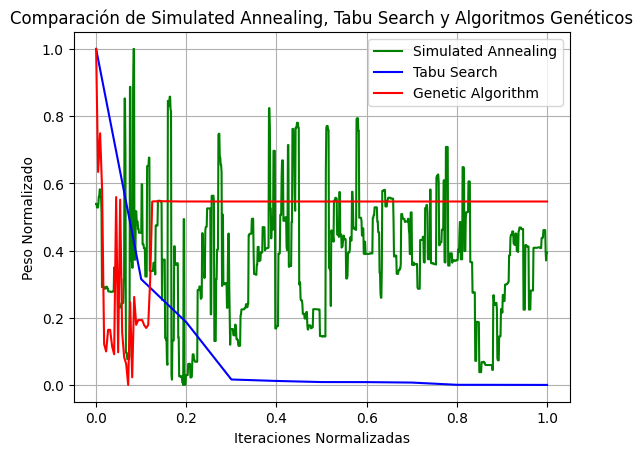

In [16]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 3

Simulated_Annealing
1001 Epoch | Equilibrium 21 | Temperature 196.26 | Cost function: -552.756  | Aceptance: 100.00 | Function Call: 2000
Solucion: [1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 1 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
TabuSearch
iterations 10 | call_functions 2000 | Best: -425.274 | actual_sol: -425.274
Solucion: [0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
Genetic Algorithm


 Generations 224 | call_functions 44800 | Best: -893.992

Solucion: [1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0]
Tiempo de ejecución: 00:00:05
------------------------------------------------


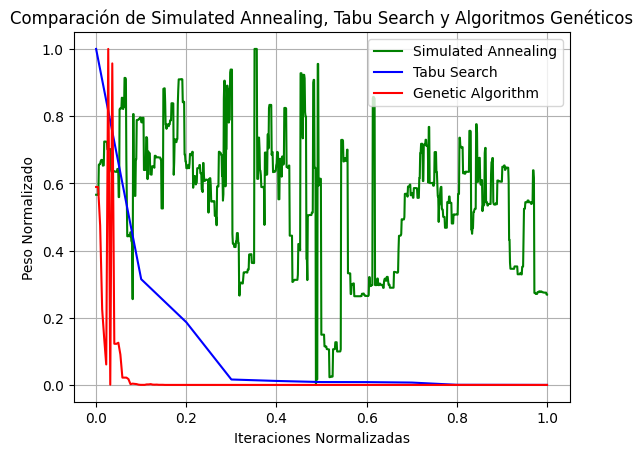

In [17]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 4

Simulated_Annealing
1001 Epoch | Equilibrium 21 | Temperature 196.26 | Cost function: -283.548  | Aceptance: 100.00 | Function Call: 2000
Solucion: [1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
TabuSearch
iterations 10 | call_functions 2000 | Best: -425.274 | actual_sol: -425.274
Solucion: [0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
Genetic Algorithm


 Generations 220 | call_functions 44000 | Best: -856.058

Solucion: [1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1]
Tiempo de ejecución: 00:00:05
------------------------------------------------


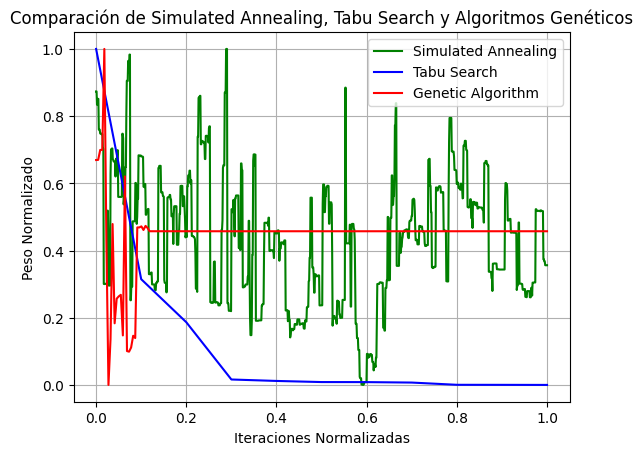

In [18]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 5

Simulated_Annealing
1001 Epoch | Equilibrium 21 | Temperature 196.26 | Cost function: -482.494  | Aceptance: 100.00 | Function Call: 2000
Solucion: [1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
TabuSearch
iterations 10 | call_functions 2000 | Best: -425.274 | actual_sol: -425.274
Solucion: [0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
Genetic Algorithm
Solucion: [0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Tiempo de ejecución: 00:00:06
------------------------------------------------


 Generations 228 | call_functions 45600 | Best: -934.528

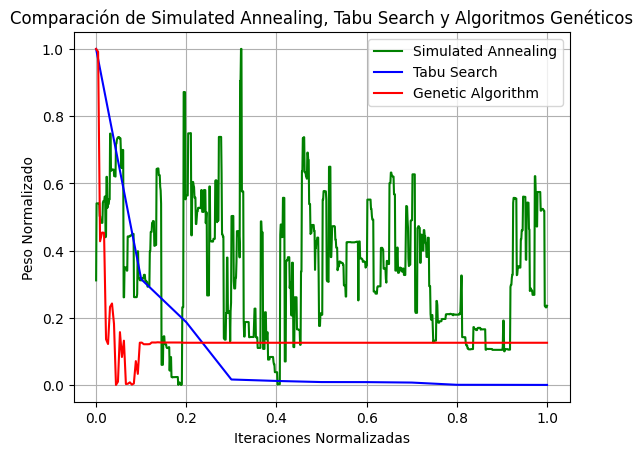

In [19]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 6

Simulated_Annealing
1001 Epoch | Equilibrium 21 | Temperature 196.26 | Cost function: -540.746  | Aceptance: 100.00 | Function Call: 2000
Solucion: [1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1
 0 1 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
TabuSearch
iterations 10 | call_functions 2000 | Best: -425.274 | actual_sol: -425.274
Solucion: [0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
Genetic Algorithm


 Generations 229 | call_functions 45800 | Best: -888.857

Solucion: [0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1
 0 0 0]
Tiempo de ejecución: 00:00:05
------------------------------------------------


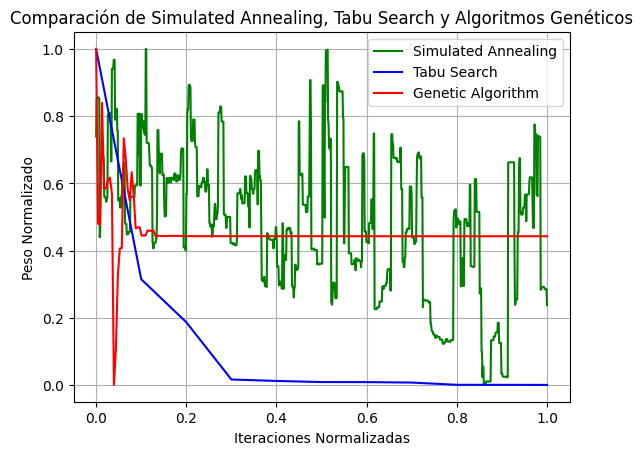

In [20]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 7

Simulated_Annealing
1001 Epoch | Equilibrium 21 | Temperature 196.26 | Cost function: -495.421  | Aceptance: 100.00 | Function Call: 2000
Solucion: [1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1
 0 0 0]
Tiempo de ejecución: 00:00:00
------------------------------------------------
TabuSearch
iterations 10 | call_functions 2000 | Best: -425.274 | actual_sol: -425.274
Solucion: [0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
Genetic Algorithm


 Generations 230 | call_functions 46000 | Best: -888.836

Solucion: [0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1
 0 0 0]
Tiempo de ejecución: 00:00:07
------------------------------------------------


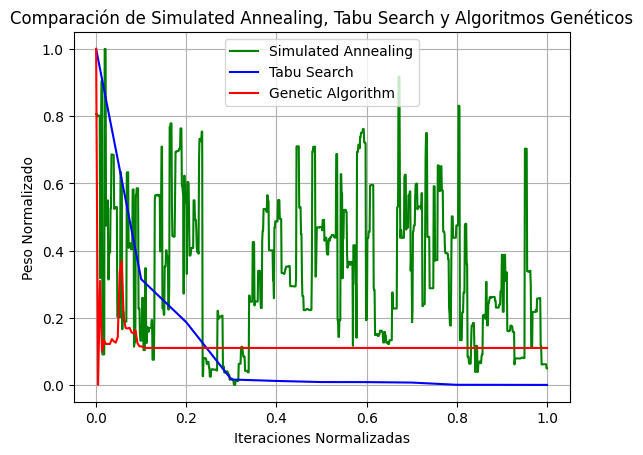

In [21]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 8

Simulated_Annealing
1001 Epoch | Equilibrium 21 | Temperature 196.26 | Cost function: -293.643  | Aceptance: 100.00 | Function Call: 2000
Solucion: [1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1
 0 1 0]
Tiempo de ejecución: 00:00:00
------------------------------------------------
TabuSearch


iterations 10 | call_functions 2000 | Best: -425.288 | actual_sol: -425.288
Solucion: [0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
Genetic Algorithm


 Generations 229 | call_functions 45800 | Best: -892.876

Solucion: [1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 1 0 0]
Tiempo de ejecución: 00:00:06
------------------------------------------------


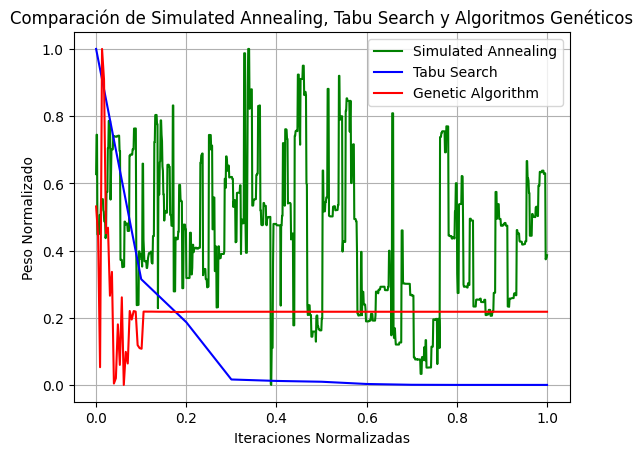

In [22]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 9

Simulated_Annealing
1001 Epoch | Equilibrium 21 | Temperature 196.26 | Cost function: -284.195  | Aceptance: 100.00 | Function Call: 2000
Solucion: [1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1
 1 0 0]
Tiempo de ejecución: 00:00:00
------------------------------------------------
TabuSearch
iterations 10 | call_functions 2000 | Best: -418.134 | actual_sol: -418.134
Solucion: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
Genetic Algorithm


 Generations 231 | call_functions 46200 | Best: -894.556

Solucion: [1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0]
Tiempo de ejecución: 00:00:05
------------------------------------------------


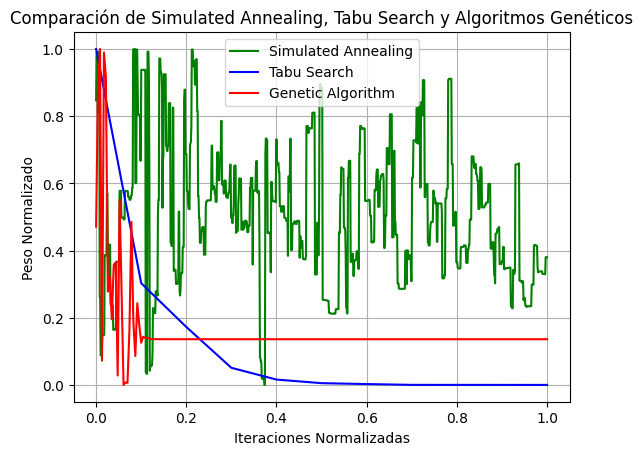

In [23]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 10

Simulated_Annealing
1001 Epoch | Equilibrium 21 | Temperature 196.26 | Cost function: -183.350  | Aceptance: 100.00 | Function Call: 2000
Solucion: [1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 0 1 0]
Tiempo de ejecución: 00:00:00
------------------------------------------------
TabuSearch
iterations 10 | call_functions 2000 | Best: -425.274 | actual_sol: -425.274
Solucion: [0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 1]
Tiempo de ejecución: 00:00:00
------------------------------------------------
Genetic Algorithm
Solucion: [0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0
 0 0 0]
Tiempo de ejecución: 00:00:05
------------------------------------------------


 Generations 223 | call_functions 44600 | Best: -888.949

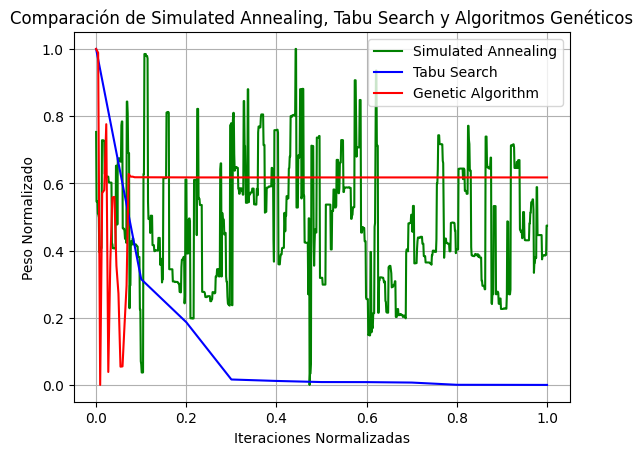

In [24]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


# Calculos estadisticos

In [25]:
print("Simulated_Annealing")
print(f"min: {min(valores_optimos_sa)}")
print(f"max: {max(valores_optimos_sa)}")
print(f"prom: {sum(valores_optimos_sa)/len(valores_optimos_sa)}")
print(f"mediana: {calcular_mediana(valores_optimos_sa)}")
print(f"Varianza: {calcular_desviacion_estandar(valores_optimos_sa)}")
print("------------------------------------------------")
print("Tabu Search")
print(f"min: {min(valores_optimos_ts)}")
print(f"max: {max(valores_optimos_ts)}")
print(f"prom: {sum(valores_optimos_ts)/len(valores_optimos_ts)}")
print(f"mediana: {calcular_mediana(valores_optimos_ts)}")
print(f"Varianza: {calcular_desviacion_estandar(valores_optimos_ts)}")
print("------------------------------------------------")
print("Genetic Algorithm")
print(f"min: {min(valores_optimos_ga)}")
print(f"max: {max(valores_optimos_ga)}")
print(f"prom: {sum(valores_optimos_ga)/len(valores_optimos_ga)}")
print(f"mediana: {calcular_mediana(valores_optimos_ga)}")
print(f"Varianza: {calcular_desviacion_estandar(valores_optimos_ga)}")
print("------------------------------------------------")

Simulated_Annealing
min: -619.1152135155454
max: -169.28738789224624
prom: -387.1787941332062
mediana: -379.23113452873963
Varianza: 156.9165802198246
------------------------------------------------
Tabu Search
min: -425.2882111180563
max: -418.13394632744644
prom: -424.5617878331115
mediana: -425.27446511070156
Varianza: 2.1426177546824796
------------------------------------------------
Genetic Algorithm
min: -934.5276318377773
max: -856.0584017396318
prom: -892.1281908955332
mediana: -890.9123159890854
Varianza: 17.756492054057738
------------------------------------------------
